# Landmark augmentations package demonstration

First some standard stuff (imports, load images, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from PIL import Image
from torchvision import transforms
import torchvision.transforms.functional as TF

from cv2 import getRotationMatrix2D

In [2]:
# helper function to show an image tensor without permuting inline ...
def imshow(img_t):
    plt.imshow(img_t.permute(1,2,0))

In [3]:
## Get image and bboxes coords
df = pd.read_csv("landmarks.csv")

i = 0 # img index in file

img_dir = "./"
img_path = f"{img_dir}{df.iloc[i].img}"

img = Image.open(img_path)
bbox=df.iloc[i].values[1::]

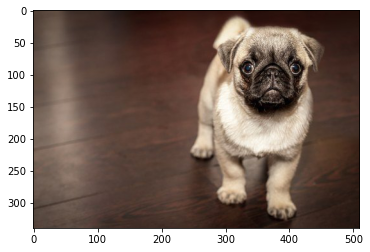

In [4]:
plt.imshow(img)

In [5]:
# Image to tensor 
img_t = transforms.ToTensor()(img)

# Some image stats
w,h = bbox[2]-bbox[0], bbox[3]-bbox[1]
centroid = np.array([bbox[0]+w//2, bbox[1]+h//2])
img_c, img_h, img_w = img_t.shape
old_size = img_t.shape[1:]

print(f"bbox: {bbox}")
print(f"w: {w}, h: {h}")
print(f"centroid: {centroid}")
print(f"img shape c:{img_c}, w:{img_w}, h:{img_h}")

bbox: [318 29 425 148]
w: 107, h: 119
centroid: [371  88]
img shape c:3, w:510, h:340


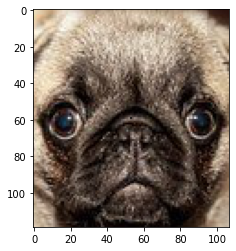

In [6]:
# at bbox center draw black pixel
img_t[:,centroid[1], centroid[0]] = torch.tensor([0,0,0])

# at img center draw white pixel
img_t[:,img_h//2, img_w//2] = torch.tensor([1,1,1])

imshow(img_t[:,bbox[1]:bbox[3],bbox[0]:bbox[2]])

## Lets try an our (lovely) package

In [7]:
import lib.augmentations as LA

In [8]:
c_o = LA.bbox_to_corners(bbox)
print(f"{c_o=}")

c_o=array([[318,  29],
       [425,  29],
       [318, 148],
       [425, 148]], dtype=int64)


## Rotate

old_size=torch.Size([340, 510])
new_size=torch.Size([576, 614])
tensor([[440.8458, 210.9591],
        [527.4106, 273.8521],
        [370.8993, 307.2321],
        [457.4642, 370.1251]], dtype=torch.float64)


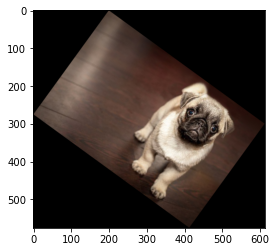

In [9]:
# Random rotate
i_r, c_r = LA.random_rotate(img_t, c_o, 45)
imshow(i_r)
print(c_r)

torch.Size([2, 2])
torch.Size([2, 2])
b_r=tensor([[370, 210],
        [527, 370]], dtype=torch.int32)
c_r=tensor([[440.8458, 210.9591],
        [527.4106, 273.8521],
        [370.8993, 307.2321],
        [457.4642, 370.1251]], dtype=torch.float64)


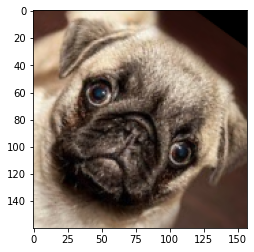

In [10]:
i_crop = LA.get_bbox_image(i_r, LA.corners_to_bbox(c_r.reshape(-1,2)))
imshow(i_crop)
b_r = LA.corners_to_bbox(c_r)
print(f"{b_r=}")
print(f"{c_r=}")

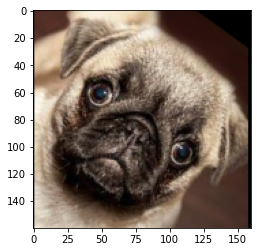

In [11]:
imshow(LA.padded_square_image(i_crop))

## Cropping

torch.Size([2, 2])
torch.Size([2, 2])


(tensor([347, 230, 537, 390], dtype=torch.int32),
 tensor([-0.0377,  0.0349,  0.0171,  0.0356]))

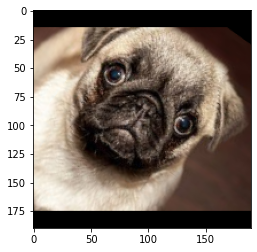

In [12]:
# Random crop
i_rc, b_rc, rc = LA.random_crop(i_r, LA.corners_to_bbox(c_r.reshape(-1,2)), 0.05, fill=0.5, return_crop=True)
imshow(LA.padded_square_image(LA.get_bbox_image(i_rc, LA.corners_to_bbox(b_rc.reshape(-1,2)))))
b_rc, rc

tensor([350, 190, 547, 390], dtype=torch.int32)
tensor([[350, 190],
        [547, 390]], dtype=torch.int32)
torch.Size([2, 2])
torch.Size([2, 2])


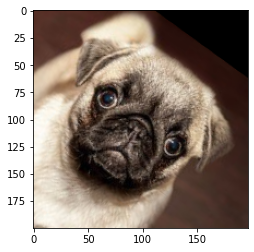

In [13]:
# Crop
i_c, b_c = LA.crop(i_r, LA.corners_to_bbox(c_r.reshape(-1,2)), -20, -20, 20, 20)
print(b_c)
print(LA.corners_to_bbox(b_c.reshape(-1,2)))
imshow(LA.get_bbox_image(i_c, LA.corners_to_bbox(b_c.reshape(-1,2))))

## Shifting

torch.Size([2, 2])
torch.Size([2, 2])


(tensor([[396, 236],
         [514, 357]], dtype=torch.int32),
 tensor([ 26, -13], dtype=torch.int32))

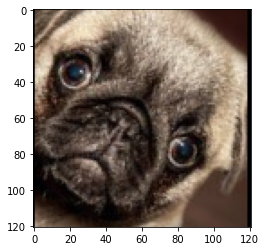

In [14]:
# Random shift
i_rc, b_rc, rc = LA.random_shift(i_r, LA.corners_to_bbox(c_r.reshape(-1,2)), 0.05, fill=0.5, return_shift=True)
imshow(LA.padded_square_image(LA.get_bbox_image(i_rc, LA.corners_to_bbox(b_rc.reshape(-1,2)))))
b_rc, rc

tensor([420.8458, 240.9591, 507.4106, 303.8521, 350.8993, 337.2321, 437.4642,
        400.1251], dtype=torch.float64)
tensor([[350, 240],
        [507, 400]], dtype=torch.int32)
torch.Size([2, 2])
torch.Size([2, 2])


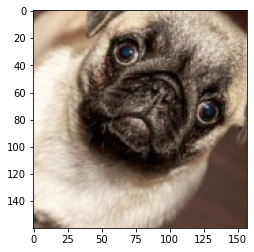

In [15]:
# Shift corners
i_s, b_s = LA.shift(i_r, c_r.reshape(-1), x_shift=-20, y_shift=30)
print(b_s)
print(LA.corners_to_bbox(b_s.reshape(-1,2)))
imshow(LA.get_bbox_image(i_s, LA.corners_to_bbox(b_s.reshape(-1,2))))

torch.Size([2, 2])
torch.Size([2, 2])


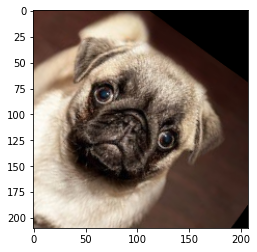

In [16]:
# Shift bbox
i_s, b_s = LA.shift(i_r, b_r, x_shift=-20, y_shift=30)
imshow(LA.get_bbox_image(i_s, b_s))

## TODO: Flipping

torch.Size([2, 2])
torch.Size([2, 2])


tensor([[396, 236],
        [514, 357]], dtype=torch.int32)

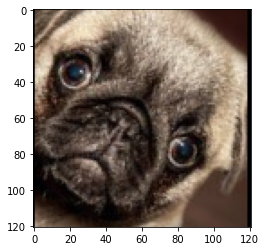

In [20]:
# Random flips (both)
i_rf, b_rf = LA.random_hflip(*LA.random_vflip(i_rc, b_rc))
imshow(LA.padded_square_image(LA.get_bbox_image(i_rf, LA.corners_to_bbox(b_rf.reshape(-1,2)))))
b_rf

landmarks_p=tensor([[218, 378],
        [514, 357]], dtype=torch.int32)
torch.Size([2, 2])
torch.Size([2, 2])


tensor([[514, 357],
        [218, 378]], dtype=torch.int32)

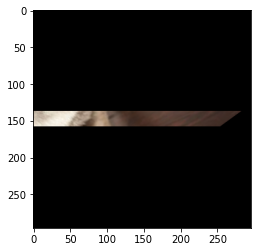

In [24]:
# Horizontal flip
i_hf, b_hf = LA.hflip(i_rc, b_rc)
imshow(LA.padded_square_image(LA.get_bbox_image(i_hf, LA.corners_to_bbox(b_hf.reshape(-1,2)))))
b_hf

landmarks_p=tensor([[396, 236],
        [ 62, 219]], dtype=torch.int32)
torch.Size([2, 2])
torch.Size([2, 2])


tensor([[396, 236],
        [ 62, 219]], dtype=torch.int32)

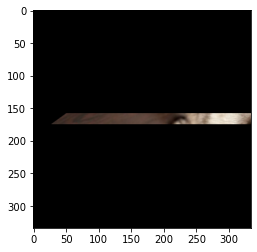

In [22]:
# Vertical flip
i_vf, b_vf = LA.vflip(i_rc, b_rc)
imshow(LA.padded_square_image(LA.get_bbox_image(i_vf, LA.corners_to_bbox(b_vf.reshape(-1,2)))))
b_vf

## TODO: Streamline the coordinate system to use [2,-1] or [-1] for all ...